In [1]:
import sys
import pandas as pd
sys.path.insert(0, "/raid/mohamed/cancer-segmentation")
sys.path.insert(0, "/raid/mohamed/siim-isic-melanoma-classification")
from dataset.dataset_melanoma import DatasetMelanoma as Dataset
from utils.predict import Segment
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

**Initialize a semantic segmentation instance**

In [2]:
path = '/raid/mohamed/cancer-segmentation/exp/iternet/_epoch_99.pth'
segment = Segment(path)

**Initialize datasets for positive and negative examples**

In [3]:
train = pd.read_csv('/raid/mohamed/siim-isic-melanoma-classification/data/train.csv')
I = train['target']==1
df_pos = train[I]
df_neg = train[~I]

In [4]:
image_dir = '/raid/mohamed/siim-isic-melanoma-classification/data/jpeg/train/'
transform = transforms.Resize((256, 256))
dataset_pos = Dataset(df=df_pos,
                      image_dir=image_dir,
                      transform=transform
                     )
dataset_neg = Dataset(df=df_neg,
                      image_dir=image_dir,
                      transform=transform
                     )

**Perform semantic segmentation**

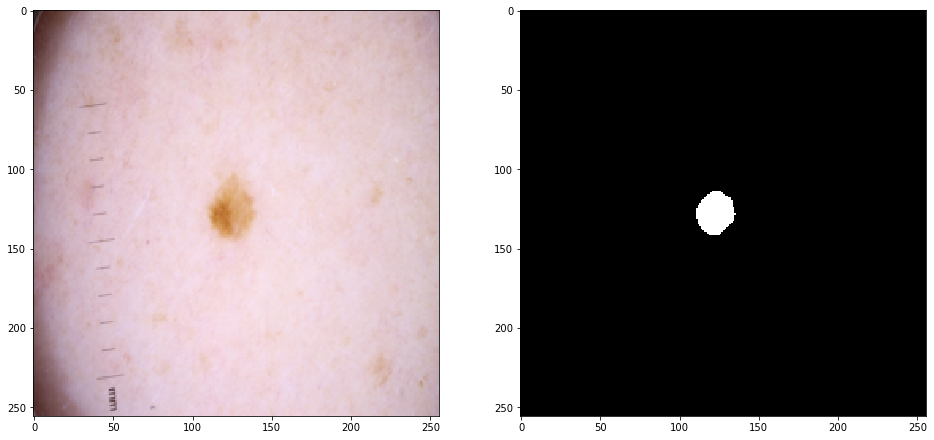

In [6]:
(img, _), _ = dataset_neg[10033]
mask = segment(img)
mask_ = 0 * mask
mask_[mask>0.5] = 255
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
ax[0].imshow(img)
ax[1].imshow(mask_, cmap="gray")